La base de datos House_price.csv contiene información de casas. La idea
es obtener un modelo que permita predecir el valor de venta de una casa.
Las variables son las siguientes:

- LotFrontage: Pies lineales de calle conectados a la propiedad
- LotArea: Tamaño del lote en pies cuadrados
- MasVnrArea: Área de revestimiento de mampostería en pies cuadrados
- BsmtFinSF1: Pies cuadrados del sótano terminados tipo 1
- BsmtFinSF2: Pies cuadrados con del sótano acabados tipo 2
- BsmtUnfSF: Pies cuadrados sin terminar de área del sótano
- TotalBsmtSF: Total de pies cuadrados de área del sótano
- 1stFlrSF: Pies cuadrados del primer piso
- 2ndFlrSF: Pies cuadrados del segundo piso
- LowQualFinSF: Pies cuadrados con acabado de baja calidad (todos los pisos)
- GrLivArea: Pies cuadrados de área habitable sobre el nivel (suelo)
- GarageArea: Tamaño del garaje en pies cuadrados
- WoodDeckSF: Área de la plataforma de madera en pies cuadrados
- OpenPorchSF: Área del porche abierto en pies cuadrados
- EnclosedPorch: Área del porche cerrado en pies cuadrados
- 3SsnPorch: área de porche de tres estaciones en pies cuadrados
- ScreenPorch: Área del porche de la pantalla en pies cuadrados
- PoolArea: Área de la piscina en pies cuadrados
- MiscVal: Valor de la función miscelánea
- SalePrice: el precio de venta de la propiedad en dólares. Esta es la variable objetivo que se quiere modelar.

a) Cargue la base de datos, ¿hay alguna columna que no sea útil para el
análisis?. Revise si existen casos faltantes en la base de datos, según la
descripción de las variables, ¿qué pudiera significar un NA? Tome
decisiones de qué hacer si existen casos faltantes. Si desea imputar los
valores nulos de alguna variable por un valor puede utilizar
data["columna"].fillna('valor', inplace = True).

In [1]:
import pandas as pd
#Dividir en punto y coma ademas de considerar el punto como decimal. Y mostar. 
df1 = pd.read_csv("CD - M6 AE4 house_price.csv", sep=';', decimal='.')
display(df1)

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,0,0,953,953,953,694,...,1647,460,0,40,0,0,0,0,0,175000
1456,1457,85.0,13175,119.0,790,163,589,1542,2073,0,...,2073,500,349,0,0,0,0,0,0,210000
1457,1458,66.0,9042,0.0,275,0,877,1152,1188,1152,...,2340,252,0,60,0,0,0,0,2500,266500
1458,1459,68.0,9717,0.0,49,1029,0,1078,1078,0,...,1078,240,366,0,112,0,0,0,0,142125


In [2]:
df = df1.drop(['Id'], axis=1) 
display(df)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


In [3]:
df.isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [4]:
df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [5]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)
df.fillna(df.mean())

df['LotFrontage'].fillna(value=df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(value=df['MasVnrArea'].mean(), inplace=True)

display(df)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


In [6]:
df = df.rename(columns={'1stFlrSF':'PrimeroFlrSF', '2ndFlrSF':'SegundoFlrSF', '3SsnPorch':'TerceroFlrSF'})
df

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,PrimeroFlrSF,SegundoFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,TerceroFlrSF,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


b) La variable a modelar corresponde al precio de venta de la casa en
dólares. En base a los modelos que hemos aprendido en clases, ¿qué
modelo(s) podría(n) ser de utilidad para predecir el precio de venta de
casas mediante las variables predictoras?

El modelo que puede ser util es el de regresion lineal multimple, para poder predecir el la venta de la casa en dolares, segun el conjunto de variables.

c) Vamos a implementar un modelo de regresión lineal para modelar el
precio de venta de casas. Considerando que en la base de datos tenemos varias variables que dependen de otras, ¿cuál pudiera ser el
problema que surgiría en este contexto? ¿por qué esto es un problema?
Discuta.

Al ser variables dependieentes de otras, el problema es que al tener múltiples variables y se quiere estudiar la relación entre todas pueden haber variables que etsen duplicnado el valor o dos variables bloqueando el efecto de una tercera (o más) variables. De esta forma la correlación parcial permite estudiar la relación lineal, entre variables.

In [9]:
import statsmodels.formula.api as sfm 
lm = sfm.ols(formula="SalePrice ~ PrimeroFlrSF + SegundoFlrSF + TerceroFlrSF + MiscVal + LotFrontage + LotArea + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + LowQualFinSF + GrLivArea + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ScreenPorch + PoolArea ", data=df).fit()
lm.params

Intercept       -8808.238679
PrimeroFlrSF       29.196990
SegundoFlrSF       36.570543
TerceroFlrSF       51.798796
MiscVal            -1.006066
LotFrontage       -47.642476
LotArea             0.178696
MasVnrArea         44.570039
BsmtFinSF1         21.502021
BsmtFinSF2          0.245830
BsmtUnfSF           9.583445
TotalBsmtSF        31.331296
LowQualFinSF      -36.162034
GrLivArea          29.605499
GarageArea         85.577696
WoodDeckSF         54.146216
OpenPorchSF        46.072088
EnclosedPorch     -56.412530
ScreenPorch        47.935476
PoolArea          -67.540295
dtype: float64

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     193.4
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:20:05   Log-Likelihood:                -17677.
No. Observations:                1460   AIC:                         3.539e+04
Df Residuals:                    1442   BIC:                         3.548e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8808.2387   4881.217     -1.805      0.071   -1.84e+04     766.807
PrimeroFlrSF     29.1970      7.365      3.964      0.000      14.750      43.644
SegundoFlrSF     36.5705      6.594      5.546      0.000      23.635      49.506
TerceroFlrSF     51.7988     39.652      1.306      0.192     -25.982     129.580
MiscVal          -1.0061      2.336     -0.431      0.667      -5.588       3.576
LotFrontage     -47.6425     60.904     -0.782      0.434    -167.113      71.828
LotArea           0.1787      0.127      1.412      0.158      -0.070       0.427
MasVnrArea       44.5700      7.389      6.032      0.000      30.075      59.065
BsmtFinSF1       21.5020      2.828      7.604      0.000      15.955      27.049
BsmtFinSF2        0.2458      5.593      0.044      0.965     -10.725      11.216
BsmtUnfSF         9.5834      2.636      3.636      0.000       4.413      14.754
TotalBsmtSF      31.3313      3.937      7.958      0.000      23.608      39.055
LowQualFinSF    -36.1620     18.244     -1.982      0.048     -71.950      -0.374
GrLivArea        29.6055      6.168      4.800      0.000      17.506      41.705
GarageArea       85.5777      6.800     12.586      0.000      72.239      98.916
WoodDeckSF       54.1462      9.961      5.436      0.000      34.607      73.685
OpenPorchSF      46.0721     18.860      2.443      0.015       9.076      83.069
EnclosedPorch   -56.4125     19.586     -2.880      0.004     -94.833     -17.992
ScreenPorch      47.9355     21.256      2.255      0.024       6.240      89.631
PoolArea        -67.5403     29.830     -2.264      0.024    -126.054      -9.026
==============================================================================
Omnibus:                      822.796   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88535.269
Skew:                          -1.674   Prob(JB):                         0.00
Kurtosis:                      41.002   Cond. No.                     1.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

d) Realice un análisis de la correlación entre las variables. Comente,
¿existen variables muy correlacionadas entre sí? ¿Por qué cree que
ocurre?

In [11]:
corr_df = df.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,PrimeroFlrSF,SegundoFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,TerceroFlrSF,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.306795,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901
LotArea,0.306795,1.000000,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.179283,0.103960,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,0.475241
BsmtFinSF1,0.215828,0.214103,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.043340,0.111170,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.122156,-0.002618,0.114184,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.363358,0.260833,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
PrimeroFlrSF,0.414266,0.299475,0.342160,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
SegundoFlrSF,0.072483,0.050986,0.174019,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.036849,0.004779,-0.069068,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


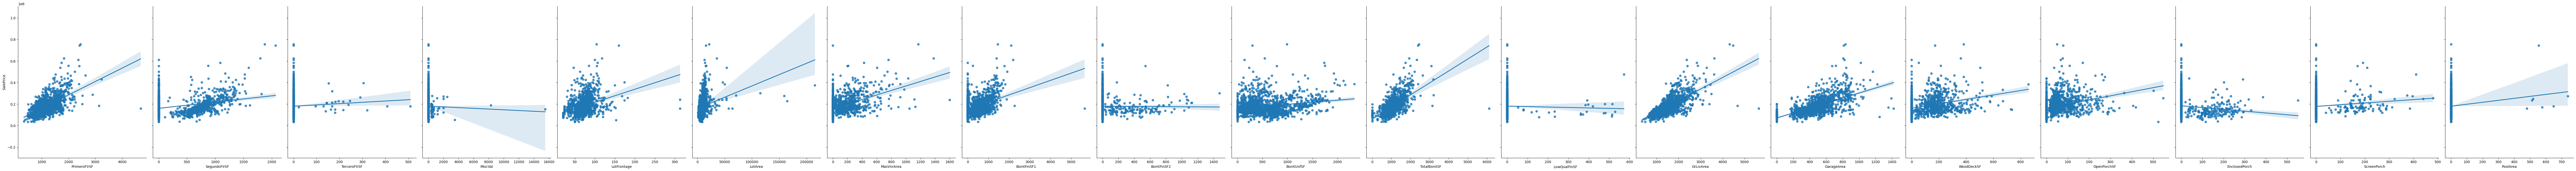

In [12]:
import seaborn as sns  # Gráficos

sns.pairplot(df, x_vars=['PrimeroFlrSF', 'SegundoFlrSF', 'TerceroFlrSF', 'MiscVal', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea'], y_vars='SalePrice', size=7, aspect=0.8,kind = 'reg')

Al tener pocas variables correlacionadas, puede ser porque no existe una tendencia entre ambas variable o que esta sea más compleja que una tendencia por asociación entre dos variables creciente o decreciente de los datos. Ademas se puede identificar que existe una correlacion fuerte directa entre TotalBsmtSF (Total de pies cuadrados de área del sótano) y PrimeroFlrSF  (Pies cuadrados del primer piso). Y una correlacion medianamente fuerte directa entre GrLivArea Pies cuadrados de área habitable sobre el nivel suelo) y SegundoFlrSF  (Pies cuadrados del segundo piso). Ademas de una orrelacion medianamente fuerte directa del precio y MasVnrArea (Área de revestimiento de mampostería en pies cuadrados), TotalBsmtSF (Total de pies cuadrados de área del sótano), 1stFlrSF (Pies cuadrados del primer piso), GrLivArea (Pies cuadrados de área habitable sobre el nivel suelo) y GarageArea (Pies cuadrados de área habitable sobre el nivel suelo).

e) Suponga que este es un problema de gran volumen, donde tenemos
muchas columnas y registros. Cuando existen variables muy
correlacionadas el costo computacional para obtener el modelo puede
ser muy elevado. Obtenga el tiempo de procesamiento para obtener
una regresión lineal. Para esto, podemos obtener la regresión lineal
utilizando la función LinearRegression de sklearn.linear_model y
calcular el tiempo de procesamiento de la siguiente forma:

In [18]:
X_entrena = df.iloc[:,0:19]
Y_entrena = df.iloc[:,19:20]
Y_entrena.values

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [14]:
from sklearn.linear_model import LinearRegression
modelo_rm = LinearRegression()
modelo_rm.fit(X_entrena,Y_entrena)

LinearRegression()

In [17]:
from datetime import datetime
start=datetime.now()
modelo_rm = LinearRegression()
modelo_rm.fit(X_entrena,Y_entrena)
print(datetime.now()-start) 
#esto entrega el tiempo que demoró en correr el modelo.

0:00:00.006982


f) Obtenga las componentes principales utilizando las variables
estandarizadas, si desea explicar un 80% de la variabilidad, ¿cuántas
componentes debería elegir? Argumente.

 Respecto a la evaluacion de la variable Precio de venta, se identifica que tiene una correlacion positiva medianamente fuerte entre la variable MasVnrArea (Área de revestimiento de mampostería en pies cuadrados), TotalBsmtSF (Total de pies cuadrados de área del sótano), 1stFlrSF (Pies cuadrados del primer piso), GrLivArea (Pies cuadrados de área habitable sobre el nivel suelo) y GarageArea (Pies cuadrados de área habitable sobre el nivel suelo). 

g) Corra el modelo de regresión lineal con las componentes principales
como variables predictoras. Vuelva a calcular el tiempo de
procesamiento. ¿En cuál caso suele demorarse menos? ¿Qué ganamos
al realizar componentes principales? Concluya.

In [63]:
import itertools
y = Y_entrena

all_vars = df[['MasVnrArea', 'TotalBsmtSF', 'PrimeroFlrSF' , 'SegundoFlrSF', 'GrLivArea', 'GarageArea']]
modelos = []
for k in range(1, len(all_vars)+1):
    subconjuntos = itertools.combinations(all_vars, k)
    for sc in subconjuntos:
        #Escribir los valores (y)
        formula = 'y ~' + ' + '.join(list(sc))
        result = smf.ols(formula, data=df).fit()
        modelos.append({'k': k,
                        'R2adj': result.rsquared_adj,
                        'Formula': formula})
df_mdls = pd.DataFrame(modelos)
df_mdls.sort_values(['R2adj'], ascending=False)

,R2adj,Formula
57,0.675537,y ~MasVnrArea + TotalBsmtSF + PrimeroFlrSF + S...
62,0.675432,y ~MasVnrArea + TotalBsmtSF + PrimeroFlrSF + S...
59,0.673520,y ~MasVnrArea + TotalBsmtSF + SegundoFlrSF + G...
58,0.673043,y ~MasVnrArea + TotalBsmtSF + PrimeroFlrSF + G...
46,0.673021,y ~MasVnrArea + TotalBsmtSF + GrLivArea + Gara...
...,...,...
1,0.376053,y ~TotalBsmtSF
2,0.366623,y ~PrimeroFlrSF
8,0.282615,y ~MasVnrArea + SegundoFlrSF
0,0.225323,y ~MasVnrArea


In [55]:
print(df_mdls.iloc[[57],df_mdls.columns.get_indexer(["Formula"])])

                                              Formula
57  y ~ MasVnrArea + TotalBsmtSF + PrimeroFlrSF + ...


In [67]:
import statsmodels.formula.api as sfm 
lm1 = sfm.ols(formula="SalePrice ~ MasVnrArea + TotalBsmtSF + PrimeroFlrSF + SegundoFlrSF + GarageArea ", data=df).fit()
lm1.params

Intercept      -14605.640983
MasVnrArea         51.700406
TotalBsmtSF        49.136096
PrimeroFlrSF       60.676274
SegundoFlrSF       67.564728
GarageArea         93.492304
dtype: float64

In [68]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     608.5
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:17:21   Log-Likelihood:                -17720.
No. Observations:                1460   AIC:                         3.545e+04
Df Residuals:                    1454   BIC:                         3.548e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.461e+04   4324.539     -3.377      0.001   -2.31e+04   -6122.638
MasVnrArea      51.7004      7.441      6.948      0.000      37.105      66.296
TotalBsmtSF     49.1361      4.835     10.162      0.000      39.651      58.621
PrimeroFlrSF    60.6763      5.527     10.977      0.000      49.834      71.519
SegundoFlrSF    67.5647      2.964     22.797      0.000      61.751      73.378
GarageArea      93.4923      6.824     13.700      0.000      80.106     106.879
==============================================================================
Omnibus:                      810.148   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76649.206
Skew:                          -1.666   Prob(JB):                         0.00
Kurtosis:                      38.340   Cond. No.                     6.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
X_entrena1 = df[['MasVnrArea', 'TotalBsmtSF', 'PrimeroFlrSF' , 'SegundoFlrSF','GarageArea']]
Y_entrena1 = df.iloc[:,19:20]
Y_entrena1.values

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [70]:
from datetime import datetime
start=datetime.now()
modelo_rm = LinearRegression()
modelo_rm.fit(X_entrena1,Y_entrena1)
print(datetime.now()-start) 
#esto entrega el tiempo que demoró en correr el modelo.

0:00:00.038367


Al seleccionar las variables que son las principales predictoras el tiempo de calculo disminuyo a la mitad, en el analisis, obteninedo a su vez mejores resultados. De esta forma los componentes principales resultan ser 'MasVnrArea', 'TotalBsmtSF', 'PrimeroFlrSF' , 'SegundoFlrSF' y 'GarageArea'.